# Model Representation

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# x_train is the input variable (size in 1000 square feet)
# y_train is the target price (price in 1000s of rupees)
x_train = np.array([1.0,2.0])
y_train = np.array([300.0,500.0])
print(f"x_train = {x_train}")
print(f"y_train = {y_train}")

x_train = [1. 2.]
y_train = [300. 500.]


In [3]:
# m is the no of training examples
print(f"x_train.shape: {x_train.shape}")
m = x_train.shape[0]
print(f"Number of training examples are: {m}")

x_train.shape: (2,)
Number of training examples are: 2


In [4]:
## we can use like this also 
len(x_train)

2

#### Training example x_i,y_i

In [5]:
i = 0 # change this to see (x^1, y^1)

x_i = x_train[i]
y_i = y_train[i]
print(f"(x^({i}), y^({i})) = ({x_i},{y_i})")

(x^(0), y^(0)) = (1.0,300.0)


In [6]:
for i in range(len(x_train)):
    x_i = x_train[i]
    y_i = y_train[i]
    print(f"(x^({i}), y^({i})) = ({x_i},{y_i})")
    

(x^(0), y^(0)) = (1.0,300.0)
(x^(1), y^(1)) = (2.0,500.0)


#### Plotting the data

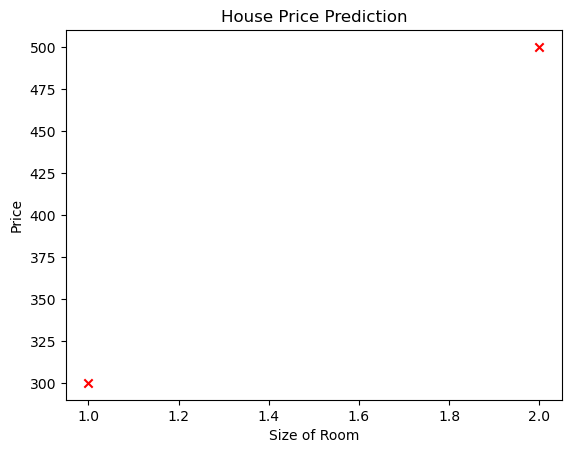

In [7]:
plt.scatter(x_train,y_train,marker='x', c='r')
plt.title('House Price Prediction')
plt.ylabel('Price')
plt.xlabel('Size of Room')
plt.show()

In [8]:
w = 200
b = 100
print(f'w:{w}')
print(f'b:{b}')

w:200
b:100


In [9]:
def compute_model_output(x,w,b):
    m=x.shape[0]
    f_wb=np.zeros(m)
    for i in range(m):
        f_wb[i] = w * x[i] + b
    return f_wb

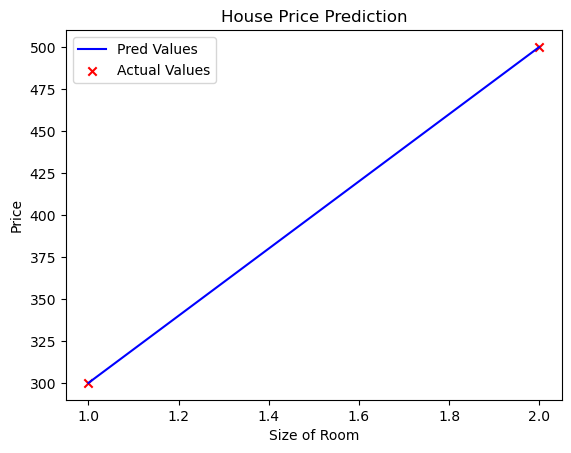

In [10]:
tmp_f_wb = compute_model_output(x_train,w,b)

plt.plot(x_train,tmp_f_wb,c='b',label='Pred Values')
plt.scatter(x_train,y_train,marker='x',c='r',label='Actual Values')
plt.title('House Price Prediction')
plt.ylabel('Price')
plt.xlabel('Size of Room')
plt.legend()
plt.show()

#### Prediction

In [11]:
w=200
b = 100
x_i = 1.23
cost_1200ft=w*x_i+b
print(f"{cost_1200ft:.0f} thousand dollars")

346 thousand dollars


# Cost Function

In [12]:
x_train = np.array([1.0,2.0])
y_train = np.array([300.0,500.0])

#### Computing cost

* y = mx+b
* J = (1/2m) * sum([y_pred - y_actual]^2)

In [13]:
def compute_cost(x,y,w,b):
    m=x_train.shape[0]

    cost_sum = 0
    for i in range(m):
        f_wb = w*x[i]+b
        cost = (f_wb - y[i]) ** 2
        cost_sum = cost_sum + cost
    total_cost = (1/(2*m)) * cost_sum

    return total_cost

In [14]:
compute_cost(x_train,y_train,200,100)

0.0

In [15]:
x_train = np.array([1.0, 1.7, 2.0, 2.5, 3.0, 3.2])
y_train = np.array([250, 300, 480,  430,   630, 730,])

In [16]:
compute_cost(x_train,y_train,200,100)

4700.0

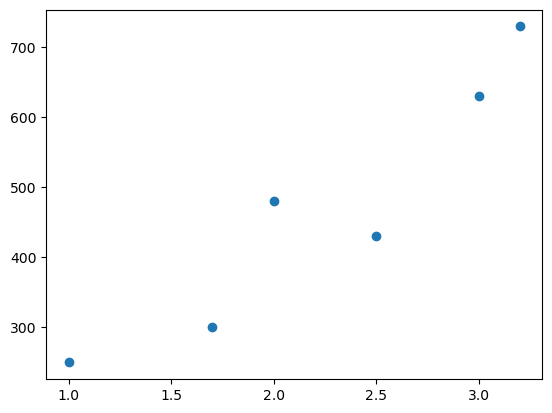

In [17]:
plt.scatter(x_train,y_train)

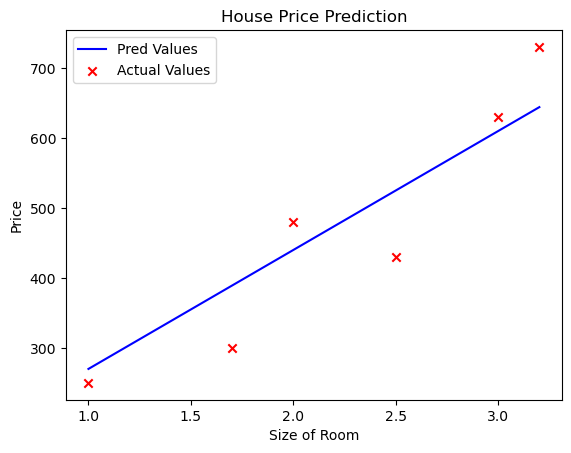

In [18]:
tmp_f_wb = compute_model_output(x_train,170,100)

plt.plot(x_train,tmp_f_wb,c='b',label='Pred Values')
plt.scatter(x_train,y_train,marker='x',c='r',label='Actual Values')
plt.title('House Price Prediction')
plt.ylabel('Price')
plt.xlabel('Size of Room')
plt.legend()
plt.show()

# Gradient Descent

In [19]:
import math, copy

In [20]:
x_train =np.array([1.0,2.0])
y_train = np.array([300.0,500.0])

### Compute Cost

In [21]:
def compute_cost(x,y,w,b):
    m = x.shape[0]
    cost = 0
    for i in range(m):
        f_wb=w*x[i]+b
        cost = cost + (f_wb - y[i])**2
    total_cost = 1/(2*m) * cost
    return total_cost

### compute_gradient

In [22]:
def compute_gradient(x,y,w,b):
    m =x.shape[0]
    dj_dw = 0
    dj_db = 0

    for i in range(m):
        f_wb = w * x[i] + b
        dj_dw_i = (f_wb - y[i]) * x[i]
        dj_db_i = f_wb - y[i]
        dj_db += dj_db_i
        dj_dw += dj_dw_i
    dj_dw = dj_dw / m
    dj_db = dj_db / m

    return dj_dw, dj_db

### Gradient Descent

In [23]:
def gradient_descent(x,y,w_in,b_in,alpha,num_iters, cost_function,gradient_function):
    w = copy.deepcopy(w_in) # avoid modifying global w_in
    # An array to store cost J and w's at each iteration primarily for graping later
    J_history = []
    p_history = []
    b = b_in
    w = w_in

    for i in range(num_iters):
        # calculate the gradient and update the parameters using gradient_function
        dj_dw,dj_db = gradient_function(x,y,w,b)

        # Update parameters using eqn (3) above
        b = b - alpha * dj_db
        w = w - alpha * dj_dw

        # save cost J at each iteration
        if i<100000: #prevent resource exhaustion
            J_history.append(cost_function(x,y,w,b))
            p_history.append([w,b])
        # Print cost every at intervals 10 times or as many iterations if <10
        if i% math.ceil(num_iters/10) == 0:
            print(f"iteration {i:4}: Cost {J_history[-1]:0.2e}",
                 f"dj_dw: {dj_dw:0.3e}, dj_db:{dj_db:0.3e}",
                 f"w:{w:0.3e},b:{b:0.5e}")

    return w,b,J_history, p_history #return w and J,w history for graphing

In [24]:
# initialize parameters
w_init = 0
b_init = 0

# some gradient descent settings
iterations = 10000
tmp_alpha = 1.0e-2

# run gradient descent
w_final, b_final, J_hist, p_hist = gradient_descent(x_train,y_train,w_init,b_init, tmp_alpha,
                                                   iterations,compute_cost,compute_gradient)
print(f"(w,b) found by gradient descent: ({w_final:8.4f},{b_final:8.4f})")

iteration    0: Cost 7.93e+04 dj_dw: -6.500e+02, dj_db:-4.000e+02 w:6.500e+00,b:4.00000e+00
iteration 1000: Cost 3.41e+00 dj_dw: -3.712e-01, dj_db:6.007e-01 w:1.949e+02,b:1.08228e+02
iteration 2000: Cost 7.93e-01 dj_dw: -1.789e-01, dj_db:2.895e-01 w:1.975e+02,b:1.03966e+02
iteration 3000: Cost 1.84e-01 dj_dw: -8.625e-02, dj_db:1.396e-01 w:1.988e+02,b:1.01912e+02
iteration 4000: Cost 4.28e-02 dj_dw: -4.158e-02, dj_db:6.727e-02 w:1.994e+02,b:1.00922e+02
iteration 5000: Cost 9.95e-03 dj_dw: -2.004e-02, dj_db:3.243e-02 w:1.997e+02,b:1.00444e+02
iteration 6000: Cost 2.31e-03 dj_dw: -9.660e-03, dj_db:1.563e-02 w:1.999e+02,b:1.00214e+02
iteration 7000: Cost 5.37e-04 dj_dw: -4.657e-03, dj_db:7.535e-03 w:1.999e+02,b:1.00103e+02
iteration 8000: Cost 1.25e-04 dj_dw: -2.245e-03, dj_db:3.632e-03 w:2.000e+02,b:1.00050e+02
iteration 9000: Cost 2.90e-05 dj_dw: -1.082e-03, dj_db:1.751e-03 w:2.000e+02,b:1.00024e+02
(w,b) found by gradient descent: (199.9929,100.0116)


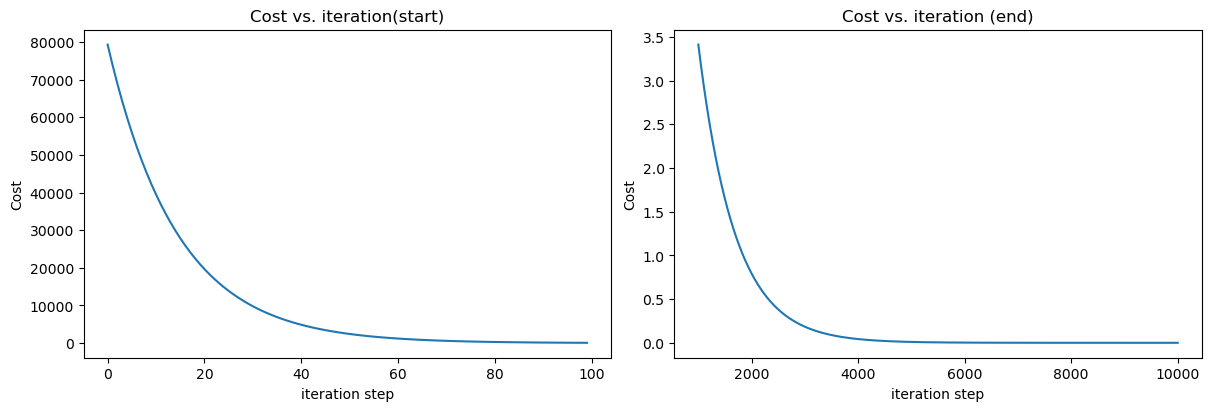

In [25]:
# plot cost versus iteration  
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12,4))
ax1.plot(J_hist[:100])
ax2.plot(1000 + np.arange(len(J_hist[1000:])), J_hist[1000:])
ax1.set_title("Cost vs. iteration(start)");  ax2.set_title("Cost vs. iteration (end)")
ax1.set_ylabel('Cost')            ;  ax2.set_ylabel('Cost') 
ax1.set_xlabel('iteration step')  ;  ax2.set_xlabel('iteration step') 
plt.show()

### Predictions

In [26]:
print(f"1000 sqft house prediction {w_final*1.0 + b_final:0.1f} Thousand dollars")
print(f"1200 sqft house prediction {w_final*1.2 + b_final:0.1f} Thousand dollars")
print(f"2000 sqft house prediction {w_final*2.0 + b_final:0.1f} Thousand dollars")

1000 sqft house prediction 300.0 Thousand dollars
1200 sqft house prediction 340.0 Thousand dollars
2000 sqft house prediction 500.0 Thousand dollars


### Increasing Learning Rate

In [31]:
# initialize parameters
w_init = 0
b_init = 0
# set alpha to a large value
iterations=10
tmp_alpha=8.0e-1
# run gradient descent
w_final, b_final, J_hist, p_hist = gradient_descent(x_train,y_train,w_init,b_init,tmp_alpha,
                                                   iterations,compute_cost,compute_gradient)

iteration    0: Cost 2.58e+05 dj_dw: -6.500e+02, dj_db:-4.000e+02 w:5.200e+02,b:3.20000e+02
iteration    1: Cost 7.82e+05 dj_dw: 1.130e+03, dj_db:7.000e+02 w:-3.840e+02,b:-2.40000e+02
iteration    2: Cost 2.37e+06 dj_dw: -1.970e+03, dj_db:-1.216e+03 w:1.192e+03,b:7.32800e+02
iteration    3: Cost 7.19e+06 dj_dw: 3.429e+03, dj_db:2.121e+03 w:-1.551e+03,b:-9.63840e+02
iteration    4: Cost 2.18e+07 dj_dw: -5.974e+03, dj_db:-3.691e+03 w:3.228e+03,b:1.98886e+03
iteration    5: Cost 6.62e+07 dj_dw: 1.040e+04, dj_db:6.431e+03 w:-5.095e+03,b:-3.15579e+03
iteration    6: Cost 2.01e+08 dj_dw: -1.812e+04, dj_db:-1.120e+04 w:9.402e+03,b:5.80237e+03
iteration    7: Cost 6.09e+08 dj_dw: 3.156e+04, dj_db:1.950e+04 w:-1.584e+04,b:-9.80139e+03
iteration    8: Cost 1.85e+09 dj_dw: -5.496e+04, dj_db:-3.397e+04 w:2.813e+04,b:1.73730e+04
iteration    9: Cost 5.60e+09 dj_dw: 9.572e+04, dj_db:5.916e+04 w:-4.845e+04,b:-2.99567e+04
